<h1 style="text-align: center;">Credit Card Fraud Detector</h1>

---

# Introdução

## Propósito

Este projeto tem como objetivo o meu aprendizado sobre comportamentos fraudulentos e a criação de um modelo de aprendizado de máquina capaz de classificar corretamente transações de cartões de crédito fraudulentas. Também irei comparar a efetividade de modelos treinados com técnicas de subamostragem e sobreamostragem, uma vez que, nestes casos, geralmente essas técnicas são necessárias para balancear as classes.

### Como?

Para isso irei utilizar um conjunto de dados proveniente da plataforma Kaggle.

Os dados estão disponíveis para download através deste link: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?datasetId=310&sortBy=voteCount

## Entendendo os dados

Este conjunto de dados contém transações de cartões de crédito feitas por Europeus em setembro de 2013 durante dois dias. Cada linha representa uma transação e cada coluna uma iformação sobre a transação.

O dataset contém 31 colunas e todas são numéricas. Sabemos o significado de apenas 3: "Time", "Amount" e "Class".
- Time: tempo (em segundos) que se passaram entre cada transação e a primeira transação do conjunto de dados
- Amount: valor da transação
- Class: variável binária que identifica transações como não-fraudulentas (0) e fraudulentas (1)

As outras 28 features ("V1", "V2"... "V28") sofreram transformação PCA e tiveram seus nomes ocultados por questões de privacidade. Ou seja, a única coisa que sabemos sobre elas é que já foram escaladas.

## Etapas do projeto

Para atingir estes objetivos planejo seguir as seguintes etapas:
- Contextualização do problema
- Importação dos dados
- Limpeza dos dados e pré-processamento
- Análise exploratória dos dados
- Treinamento, avaliação e refinamento do modelo que utilizará subamostragem
- Treinamento, avaliação e refinamento do modelo que utilizará sobreamostragem
- Conclusões finais

# Contextualização do problema

Tipicamente uma organização perde 5% da sua receita por fraude a cada ano. Na verdade, estimasse que fraude custe para o Reino Unido 73 bilhões de libras esterlinas.  
Comportamentos fraudulentos podem ser encontrados em diversas áreas. A fraude de cartão de crédito provavelmente é o exemplo mais conhecido, mas também encontramos fraude na área de seguros, lavagem de dinheiro, evasão fiscal etc.

## Alguns fatores dificultam a detecção de fraude:

- Casos de fraude são minoria: geralmente menos de 1% das transações de uma empresa são fauduletas
- Fraudadores tentam ao máximo "se misturar" e esconder as suas atividades
- Fraudadores mudam seus métodos e comportamentos com o tempo
- Fraudadores geralmente trabalham em conjunto de forma organizada, dificultando a detecção de fraude

## Como as empresas lidam com fraude?

Geralmente as empresas possuem um time de analistas de fraude. Esse time tenta detectar as fraudes através de alguns métodos:
- Definir regras e limiares para filtrar casos estranhos
- Ficam atentos à notícias para nomes suspeitos
- Utilizam listas de ocorrências externas da polícia e contrastam com a base de clientes
- Utilizam algorítimos de aprendizado de máquina para detectar fraude e/ou comportamentos suspeitos:
    - Os métodos anteriores podem ser úteis para treinar um modelo de aprendizado de máquina (podemos utilizá-los como "input" para a nossa análise). Porém, devemos ter em mente que os rótulos provenientes de sistemas baseados em regras podem não detectar todos os casos fraudulentos. Ou seja, devemos sempre nos perguntar se estes rótulos são confiáveis ou não.

# Importação dos dados

In [141]:
# Célula com o código para instalar as versões utilizadas nesse projeto, depois que eu concluir


In [142]:
# Importando bibliotecas úteis
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Definindo caminhos (paths)
data_in = os.path.join('dataset', 'creditcard.csv')

# Acessando o dataset
ccf_df = pd.read_csv('datasets/creditcard.csv')

# Exploração inicial dos dados

In [143]:
# Mostrando as colunas do DataFrame
ccf_df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [144]:
# Mostrando as primeiras 5 transações da tabela
ccf_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [145]:
# Mostrando a quantidade de linhas e colunas
ccf_df.shape

(284807, 31)

In [146]:
# Explorando as features disponíveis no conjunto de dados
ccf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Ótimo! não existem valores nulos. Todas as colunas são numéricas a parecem estar no tipo certo.

In [147]:
# Contando o número de ocorrências de transações fraudulentas e não fraudulentas e guardando no acrônimo occ (occurrence)
occ = ccf_df['Class'].value_counts()
display(occ)

0    284315
1       492
Name: Class, dtype: int64

Como esperado para estes casos, existe uma ocorrência muito maior de transações legítimas do que de transações fraudulentas.

Isso pode ser um problema ao treinarmos nosso modelo de aprendizagem de máquina. Geralmente estes modelos funcionam melhor quando existe um número semelhante de ocorrências em cada classe. Se existem poucos casos de fraude, então existe poucos dados para ensinar o modelo a identificar fraude.

Isso é chamado de "class imbalance" e é um dos principais desafios na detecção de fraude.

Por curiosidade, vamos ver a proporção de indivíduos em cada classe:

In [148]:
# Calculando a proporção de indivíduos em cada classe
(occ / len(ccf_df)) * 100

0    99.827251
1     0.172749
Name: Class, dtype: float64

Transações legítimas representam 99,83% das transações, enquanto transações fraudulentas representam apenas 0,17%.

Acurácia natural: isso significa que se "chutarmos" que todas as transações são legítimas acertaríamos 99,83% das vezes.

Ou seja, para casos em que os dados sofrem de desequilíbrio de classes a acurácia não é uma métrica útil. 

Neste caso, uma métrica melhor para avaliar a performance do modelo seria a pontuação de revocação (ou "recall", em inglês).

## Visualizando proporção de transações legítimas e fraudulentas

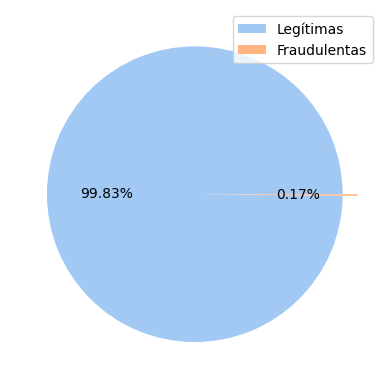

In [149]:
# Rótulos dos dados do gráfico de pizza
pie_labels = ['Legítimas', 'Fraudulentas']

# Definindo paleta de cores
pie_colors = sns.color_palette('pastel')[0:5]

# Criando gráfico de pizza
plt.pie(occ, colors=pie_colors, autopct='%0.2f%%', explode = (0, 0.1))
plt.legend(labels=pie_labels, fontsize='medium')
plt.show()

# Pré processamento dos dados

## Escalando features "Amount" e "Time"

Já vimos que as colunas "V1", "V2" ... "V28" estão escaladas. Portanto, só faltam ser escaladas as colunas "Amount" e "Time". 

A seguir vou criar novas colunas "Scaled_Amout" e "Scaled_Time", e remover as colunas coriginais.

In [150]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# Instanciando RobustScaler
rob_scaler = RobustScaler()

# Instanciando objetos que irão guardar o valro das series
Scaled_Amount = rob_scaler.fit_transform(ccf_df['Amount'].values.reshape(-1, 1))
Scaled_Time = rob_scaler.fit_transform(ccf_df['Time'].values.reshape(-1, 1))

# Criando novas colunas escaladas
ccf_df.insert(0, 'Scaled_Time', Scaled_Time)
ccf_df.insert(1, 'Scaled_Amount', Scaled_Amount)

# Removendo colunas antigas
ccf_df.drop(['Time', 'Amount'], axis=1, inplace=True)

In [151]:
# Checando o novo DataFrame
ccf_df.head()

,Scaled_Time,Scaled_Amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-0.994983,1.783274,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.994983,-0.269825,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-0.994972,4.983721,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.994972,1.418291,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-0.994960,0.670579,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


## Reamostragem dos dados

Já vimos que os dados sofrem de "class imbalance" (desequilíbrio de classe) e como isso pode afetar o treinamento dos modelos.

Para resolver este problema vou utilizar uma técnica chamada "Resampling" (reamostragem), onde eu transformo as minhas amostras para igualar o número de ocorrências entre uma classe e outra.

Tenho duas alternativas:
- Undersampling (Subamostragem): reduzir aleatoriamente a quantidade de ocorrências da classe mais prevalente (neste caso de transações legítimas)
    - Vantagens: é mais "barato" computacionalmente pois reduzimos a quantidades de dados que serão processados
    - Desvantagens: descartamos muitos dados e informações que são valiosas na hora de treinar o modelo

- Oversampling (Sobreamostragem): copiar observações aleatórias do grupo menos prevalente (neste caso transações fraudulentas) de modo que tenha o mesmo número de ocorrências que o grupo mais prevalente
    - Vantagens: simples de se implementar
    - Desvantagens: estamos apenas copiando dados, assim, treinando nosso modelo com várias duplicatas
    - Synthetic Minority Over-sampling Technique (SMOTE): técnica de "oversampling" que cria amostras sintéticas similares as amostras da classe menos prevalente. Utiliza da técnica "Nearest neighbors" (vizinhos mais próximos) para definir uma amostra sintética como fraude, por exemplo.
        - Importante: Nem sempre a reamostragem necessariamente leva a melhores resultados. Quando os casos de fraude estão muito espalhados pelos dados, o uso do SMOTE pode introduzir um pouco de viés. Os vizinhos mais próximos não são necessariamente casos de fraude, então as amostras sintéticas podem 'confundir' um pouco o modelo.

Importante: ao utilziar métodos de "resampling", devo aplicálos apenas no conjunto de treinamento. Meu objetivo é treinar melhor o modelo ao equilibrar a quantidade de ocorrências em cada grupo, e não prever as minhas amostras sintéticas.
Nosso conjunto de teste deve estar livre de dados sintéticos ou duplicados para que possamos testar o modelo em dados reais.

# Modelagem dos dados utilizando subamostragem

In [152]:
SEED = 1

# Importando biblioteca útil para dividir os dados em teste e treino
from sklearn.model_selection import train_test_split

# Importando biblioteca útil para realizar a reamostragem
from imblearn.under_sampling import RandomUnderSampler

# Instanciando RandomUnderSampler
rus = RandomUnderSampler()

# Instanciando Features
X = ccf_df.drop('Class', axis=1).values

# Instanciando Target
y = ccf_df['Class'].values.reshape(-1, 1)

# Separando os dados em 70% treino e 30% teste
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=SEED)

# Realizando a subamostragem aleatória
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

## Visualizando proporção de transações legítimas e fraudulentas no conjunto de treino

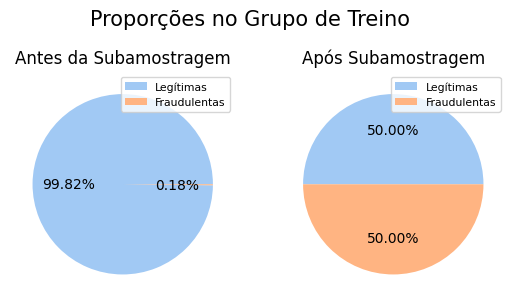

Ocorrências no conjunto de treino antes da subamostragem:
0    199007
1       357

Ocorrências no conjunto de treino após subamostragem:
0    357
1    357


In [153]:
fig, ax = plt.subplots(1, 2)

train_count = pd.Series(y_train.flatten()).value_counts()

train_resampled_count = pd.Series(y_train_resampled).value_counts()

pie_labels = ['Legítimas', 'Fraudulentas']

# Criando gráficos comparativos
fig.suptitle('Proporções no Grupo de Treino', fontsize=15, y=0.86)

ax[0].pie(train_count, colors=pie_colors, autopct='%0.2f%%')
ax[0].legend(labels=pie_labels, prop={'size':7.8})
ax[0].set_title('Antes da Subamostragem')

ax[1].pie(train_resampled_count, colors=pie_colors, autopct='%0.2f%%')
ax[1].legend(labels=pie_labels, prop={'size':7.8})
ax[1].set_title('Após Subamostragem')

plt.show()

print(f'Ocorrências no conjunto de treino antes da subamostragem:\n{train_count.to_string()}\n\nOcorrências no conjunto de treino após subamostragem:\n{train_resampled_count.to_string()}')

Percebemos que antes da reamostragem o grupo de treino possuia 199007 ocorrências de transações legítimas e 357 ocorrências de transações fraudulentas.

A reamostragem equilibrou os dois grupos, retirando aleatoriamente ocorrências de transações legítimas.

## Treinando um "Random Forest Classifier"

Decision Trees e Random Forests são modelos muito utilizados para detecção de fraude. A seguir, irei criar um modelo de Random Forest e tentar ajustar ele para performar bem com a tarefa de detecção de fraude.

In [154]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, roc_auc_score

# Instanciando RandomForestClassifier
rf = RandomForestClassifier(random_state=SEED)

# Treinando o modelo
rf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=1)

## Avaliando a performance do Classificador

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85308
           1       0.07      0.87      0.13       135

    accuracy                           0.98     85443
   macro avg       0.53      0.93      0.56     85443
weighted avg       1.00      0.98      0.99     85443

Roc AUC Score: 0.9837762165503995


c:\Users\marco\repos\Ciencia-de-dados-projetos\Projetos-portifolio\credit_card_fraud_detection_project\cc_fraud_venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


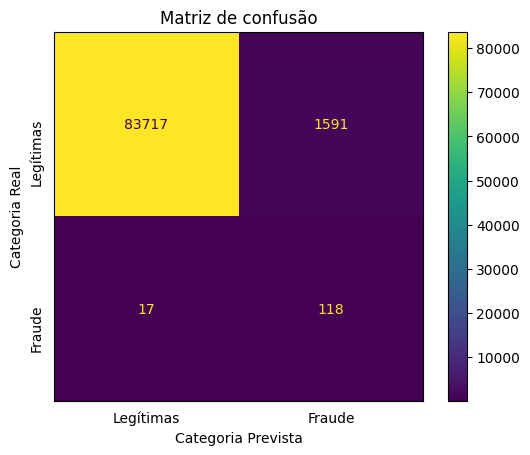

In [155]:
# Obtendo predições
y_pred = rf.predict(X_test)

# Obtendo probabilidades
y_prob = rf.predict_proba(X_test)

# Mostrando o relatório de métricas e a matriz de confusão
print(classification_report(y_test, y_pred))
print(f'Roc AUC Score: {roc_auc_score(y_test, y_prob[:,1])}')
plot_confusion_matrix(rf, X_test, y_test, display_labels=['Legítimas', 'Fraude'])
plt.yticks(rotation=90)
plt.tick_params(left=False, bottom=False)
plt.title('Matriz de confusão')
plt.ylabel('Categoria Real')
plt.xlabel('Categoria Prevista')
plt.show()

O gráfico acima apresenta as ocorrências de:
- Verdadeiro Negativo (83470): onde as transações eram legítimas e o modelo acertou, classificando elas como legítimas
- Falso Positivo (1838): onde as transações eram legítimas mas o modelo errou, classificando elas como fraude
- Falso Negativo (15): onde as transações eram fraudulentas mas o modelo errou, classificando elas como legítimas (é isso que queremos evitar o máximo possível neste caso)
- Positivo Verdadeiro (120): onde as transações eram fraudulentas e o modelo acertou, classificando elas como fraudulentas (é isso que queremos que aconteça, o máximo possível)

Percebemos que o modelo, sem qualquer tipo de refinamento, teve um número relativamente baixo de Falsos Negativos mas um número expressivo de Falso Positivo. 

Neste tipo de problema damos mais ênfase para evitar o número de Falsos Negativos, e avaliamos isso através da métrica "Recall".

A seguir, irei realizar alguns refinamentos na tentativa de melhorar a performance deste modelo para essa tarefa.

## Refinando o modelo

Primeiro irei utilizar uma técnica chamada de "hyperparameter tunning" através de uma "validação cruzada de pesquisa de grade"

In [156]:
from sklearn.model_selection import GridSearchCV

# Instanciando um novo modelo que irei refinar
ref_rf = RandomForestClassifier(class_weight='balanced_subsample', random_state=SEED)

# Instanciando uma grade de diferentes parâmetros que serão testados, e a combinação que obtiver melhor score de "Recall" será selecionada
param_grid = {
    'n_estimators': [1, 100], 
    'max_features': ['auto', 'log2', 'sqrt'],  
    'max_depth': [4, 8, None], 
    'criterion': ['gini', 'entropy']
}

# Criando modelo GridSearchCV
CV_model = GridSearchCV(estimator=ref_rf, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1)

# Treinando o modelo
CV_model.fit(X_train_resampled, y_train_resampled)

# Instanciando o modelo com melhor performance
Best_estimator = CV_model.best_estimator_

# Checando os parâmetros que foram escolhidos pela validação cruzada
print(CV_model.best_params_)

{'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'n_estimators': 100}


              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85308
           1       0.07      0.87      0.13       135

    accuracy                           0.98     85443
   macro avg       0.53      0.93      0.56     85443
weighted avg       1.00      0.98      0.99     85443

Roc AUC Score: 0.982128157838525


c:\Users\marco\repos\Ciencia-de-dados-projetos\Projetos-portifolio\credit_card_fraud_detection_project\cc_fraud_venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


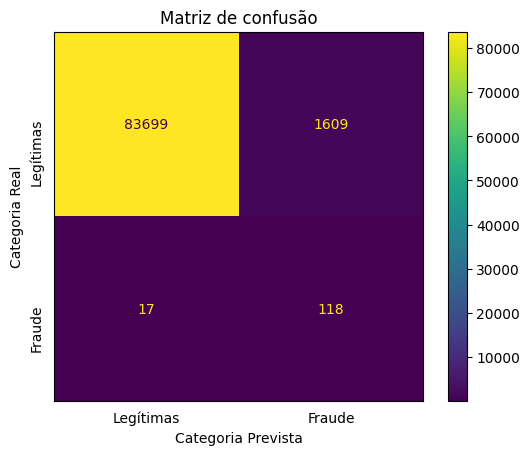

In [157]:
# Obtendo predições
y_pred_ref = Best_estimator.predict(X_test)

# Obtendo probabilidades
y_prob_ref = Best_estimator.predict_proba(X_test)

# Mostrando o relatório de métricas e a matriz de confusão
print(classification_report(y_test, y_pred_ref))
print(f'Roc AUC Score: {roc_auc_score(y_test, y_prob_ref[:,1])}')
plot_confusion_matrix(Best_estimator, X_test, y_test, display_labels=['Legítimas', 'Fraude'])
plt.yticks(rotation=90)
plt.tick_params(left=False, bottom=False)
plt.title('Matriz de confusão')
plt.ylabel('Categoria Real')
plt.xlabel('Categoria Prevista')
plt.show()

Após realizar o refinamento obtivemos uma pequena melhora nos valores de "Recall".

A seguir, irei repetir as mesmas análises mas, desta vez, utilizando outra técnica de reamostragem: sobreamostragem com a metodologia SMOTE

# Modelagem dos dados utilizando sobreamostragem

In [158]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

X_train_resampled_smote, y_train_resampled_smote = smote.fit_resample(X_train, y_train)

rf_smote = RandomForestClassifier(random_state=SEED)

rf_smote.fit(X_train_resampled_smote, y_train_resampled_smote)

KeyboardInterrupt: 

## Avaliando modelo que utilizou sobreamostragem

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.89      0.80      0.84       135

    accuracy                           1.00     85443
   macro avg       0.94      0.90      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Roc AUC Score: 0.977438614588706


c:\Users\marco\repos\Ciencia-de-dados-projetos\Projetos-portifolio\credit_card_fraud_detection_project\cc_fraud_venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


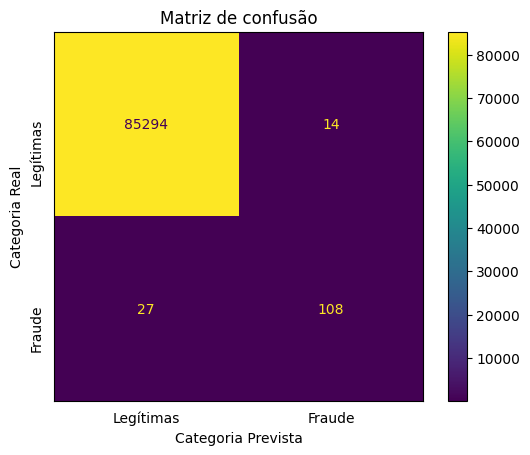

In [ ]:
y_pred_smote = rf_smote.predict(X_test)

# Obtendo probabilidades
y_prob_smote = rf_smote.predict_proba(X_test)

# Mostrando o relatório de métricas e a matriz de confusão
print(classification_report(y_test, y_pred_smote))
print(f'Roc AUC Score: {roc_auc_score(y_test, y_prob_smote[:,1])}')
plot_confusion_matrix(rf_smote, X_test, y_test, display_labels=['Legítimas', 'Fraude'])
plt.yticks(rotation=90)
plt.tick_params(left=False, bottom=False)
plt.title('Matriz de confusão')
plt.ylabel('Categoria Real')
plt.xlabel('Categoria Prevista')
plt.show()

## Realizando validação cruzada com modelo utilziando sobreamostragem

In [ ]:
# Criando modelo GSCV com sobreamostragem
CV_smote_model = GridSearchCV(estimator=rf_smote, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1)

# Treinando o modelo
CV_smote_model.fit(X_train_resampled_smote, y_train_resampled_smote)

# Instanciando o modelo com melhor performance
Best_smote_estimator = CV_smote_model.best_estimator_

# Checando os parâmetros que foram escolhidos pela validação cruzada
print(CV_smote_model.best_params_)

c:\Users\marco\repos\Ciencia-de-dados-projetos\Projetos-portifolio\credit_card_fraud_detection_project\cc_fraud_venv\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


{'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'n_estimators': 100}


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.89      0.80      0.84       135

    accuracy                           1.00     85443
   macro avg       0.94      0.90      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Roc AUC Score: 0.977438614588706


c:\Users\marco\repos\Ciencia-de-dados-projetos\Projetos-portifolio\credit_card_fraud_detection_project\cc_fraud_venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


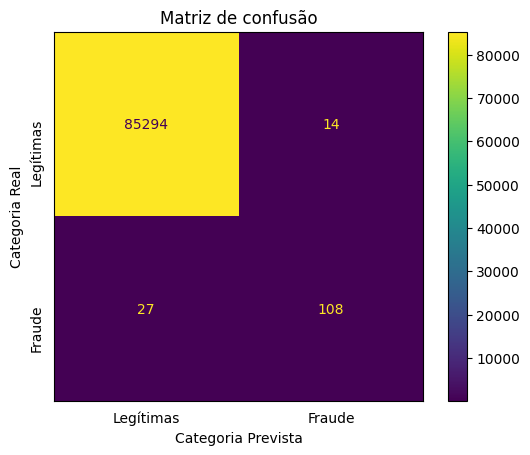

In [ ]:
y_pred_CV_smote = Best_smote_estimator.predict(X_test)

# Obtendo probabilidades
y_prob_CV_smote = Best_smote_estimator.predict_proba(X_test)

# Mostrando o relatório de métricas e a matriz de confusão
print(classification_report(y_test, y_pred_CV_smote))
print(f'Roc AUC Score: {roc_auc_score(y_test, y_prob_CV_smote[:,1])}')
plot_confusion_matrix(Best_smote_estimator, X_test, y_test, display_labels=['Legítimas', 'Fraude'])
plt.yticks(rotation=90)
plt.tick_params(left=False, bottom=False)
plt.title('Matriz de confusão')
plt.ylabel('Categoria Real')
plt.xlabel('Categoria Prevista')
plt.show()

# Conclusão

Por mais que o modelo treinado com sobreamostragem tenha retornado resultados mais harmônicos (um equilíbrio entre falsos negativos e positivos), para um banco seria mais vantajoso evitar ao máximo o número de falsos negativos. Isso porque o banco sempre pode conferir com o cliente se a transação classificada como fraudulenta é legítima, e a conforência traz menos prejuízos do que deixar passar uma transação fraudulenta.  
Por isso, o modelo escolhido por mim seria o modelo treinado com subamostragem, uma vez que retornou um melhor valor de recall e essa métrica avalia a taxa de falsos negativos.